<a href="https://colab.research.google.com/github/saiakash23/Crop-Classification-using-Deep-Learning/blob/main/VGG-16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2

import os

In [ ]:
import tensorflow as tf


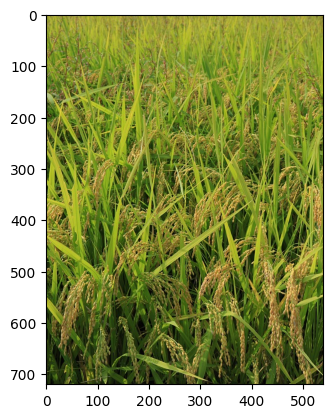

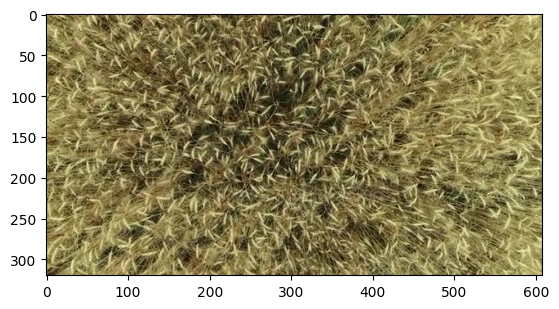

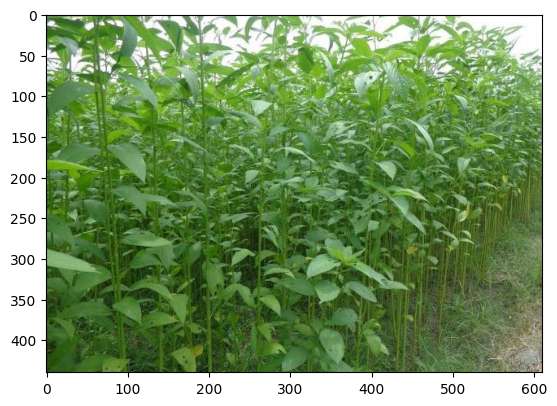

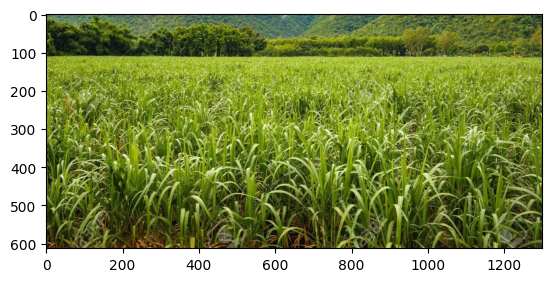

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
import matplotlib.pyplot as plt
# define location of dataset
img1 = '/content/drive/MyDrive/test_crop_image/rice-field.jpg'
img2 = '/content/drive/MyDrive/test_crop_image/wheatarial02.jpg'
img3 = '/content/drive/MyDrive/test_crop_image/juteplants.jpg'
img4 = '/content/drive/MyDrive/test_crop_image/sugarcane-farm-in-the-mountain-countryside-of-thailand.jpg'
# plot first few images
image = imread(img1)
pyplot.imshow(image)
pyplot.show()
image = imread(img2)
pyplot.imshow(image)
pyplot.show()
image = imread(img3)
pyplot.imshow(image)
pyplot.show()
image = imread(img4)
pyplot.imshow(image)
pyplot.show()

In [ ]:
from keras.preprocessing.image import img_to_array
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
def summarize_diagnostics(history):
    plt.style.use("ggplot")
    plt.figure()
    N = epochs
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.title("Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(loc="upper left")

    plt.style.use("ggplot")
    plt.figure()
    N = epochs
    plt.plot(np.arange(0, N), history.history["accuracy"], label="accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

In [ ]:
IMAGE_DIMS = (224, 224, 3)

In [ ]:
train_data_dir = '/content/drive/MyDrive/Kag2'

In [ ]:
batch_size=64

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True,vertical_flip=True, rotation_range=90)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 804 images belonging to 5 classes.


In [ ]:
nb_train_samples=804

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


img_rows = 224
img_cols = 224

pre_model = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

for layer in pre_model.layers:
    layer.trainable = False

for (i,layer) in enumerate(pre_model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
def addTopModel(bottom_model, num_classes, D=512):
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [ ]:
num_classes = 5
FC_Head = addTopModel(pre_model, num_classes)
model = Model(inputs=pre_model.input, outputs=FC_Head)
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import tensorflow as tf

# Assuming `model` and `train_generator` are defined before this code block

opt = Adam(learning_rate=0.0001)  # Update learning rate parameter

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

nb_train_samples = 804
epochs = 40
batch_size = 64

checkpoint = ModelCheckpoint("./weights.h5",
                             monitor="loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]

# Assuming train_generator generates the required data
# Verify the size of your dataset or use `repeat()` to ensure enough batches

history = model.fit(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=epochs,
                    callbacks=callbacks)


Epoch 1/40
12/12 [==============================] - ETA: 0s - loss: 1.6659 - accuracy: 0.2797 
Epoch 1: loss improved from inf to 1.66592, saving model to ./weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 168s 12s/step - loss: 1.6659 - accuracy: 0.2797
Epoch 2/40
12/12 [==============================] - ETA: 0s - loss: 1.5279 - accuracy: 0.3459
Epoch 2: loss improved from 1.66592 to 1.52791, saving model to ./weights.h5
12/12 [==============================] - 15s 1s/step - loss: 1.5279 - accuracy: 0.3459
Epoch 3/40
12/12 [==============================] - ETA: 0s - loss: 1.3760 - accuracy: 0.4270
Epoch 3: loss improved from 1.52791 to 1.37600, saving model to ./weights.h5
12/12 [==============================] - 15s 1s/step - loss: 1.3760 - accuracy: 0.4270
Epoch 4/40
12/12 [==============================] - ETA: 0s - loss: 1.2654 - accuracy: 0.4730
Epoch 4: loss improved from 1.37600 to 1.26539, saving model to ./weights.h5
12/12 [==============================] - 14s 1s/step - loss: 1.2654 - accuracy: 0.4730
Epoch 5/40
12/12 [==============================] - ETA: 0s - loss: 1.1699 - accuracy: 0.5338
Epoch 5: loss improved from 1.26539 to 1.16

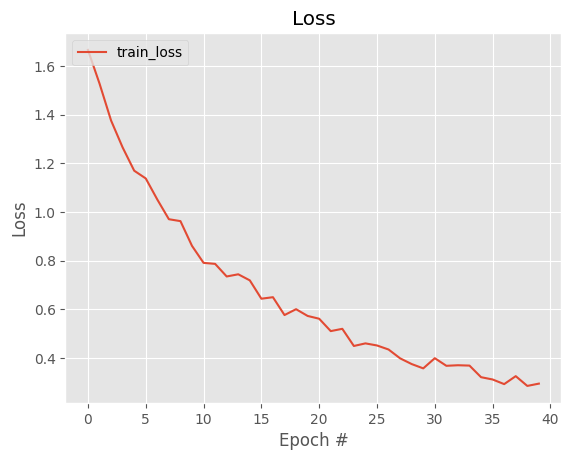

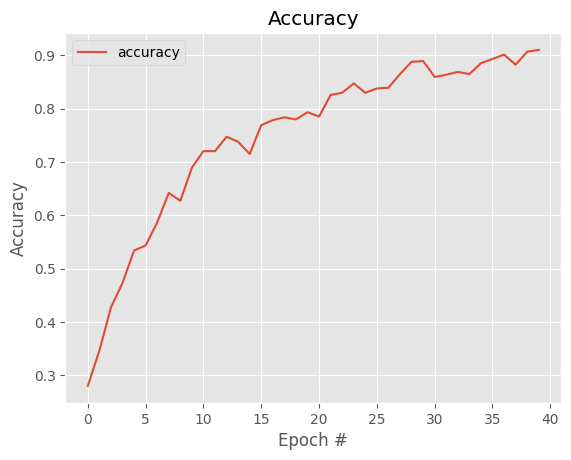

In [ ]:
summarize_diagnostics(history)

In [ ]:
test_data_dir = '/content/drive/MyDrive/crop_images'
test_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
test_batchsize = 64

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=test_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 201 images belonging to 5 classes.


In [ ]:
model.load_weights("weights.h5")
class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

<ipython-input-24-0f353008aead>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Confusion Matrix
[[40  0  0  0  0]
 [ 0 40  0  0  0]
 [ 0  2 36  1  1]
 [ 1  3  5 29  2]
 [ 0  3  2  0 36]]
Classification Report
              precision    recall  f1-score   support

        jute       0.98      1.00      0.99        40
       maize       0.83      1.00      0.91        40
        rice       0.84      0.90      0.87        40
   sugarcane       0.97      0.72      0.83        40
       wheat       0.92      0.88      0.90        41

    accuracy                           0.90       201
   macro avg       0.91      0.90      0.90       201
weighted avg       0.91      0.90      0.90       201



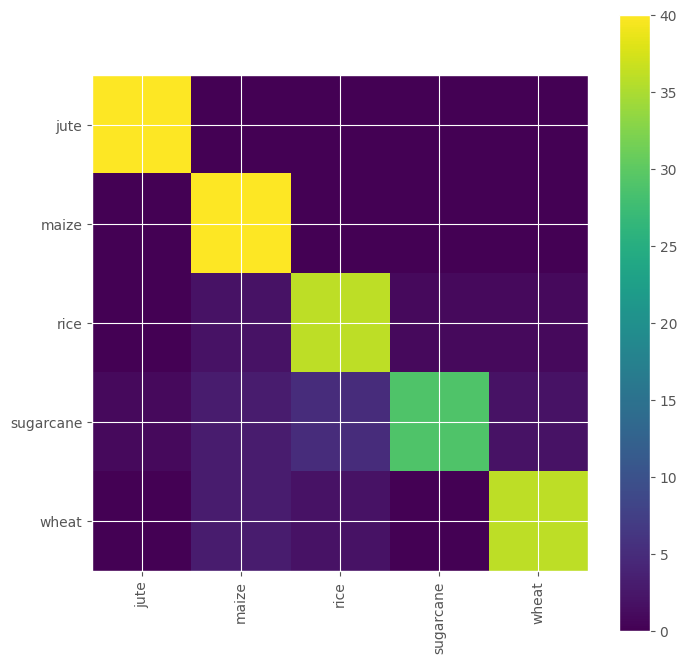

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(test_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
### SOME RANDOM IMAGES

In [ ]:
import cv2
import numpy as np

In [ ]:
def predict_crop(path,actual,class_labels):
    predict_datagen = ImageDataGenerator(rescale=1./255)
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    img = np.array(img).reshape((1, 224, 224, 3))
    Y_pred = model.predict(img)
    y_pred = np.argmax(Y_pred, axis=1)

    image = imread(path)
    pyplot.imshow(image)


    if y_pred == actual:
        print('Correct prediction')
    else:
        print("Messed up!!")
    print('Actual class "{0}" and predicted class "{1}"'.format(class_labels[actual],class_labels[int(y_pred)]))


In [ ]:
# class0-Jute
# class1-Maize
# class2-Rice
# class3-sugarcane
# class4-Wheat

1/1 [==============================] - 1s 578ms/step
Messed up!!
Actual class "sugarcane" and predicted class "maize"


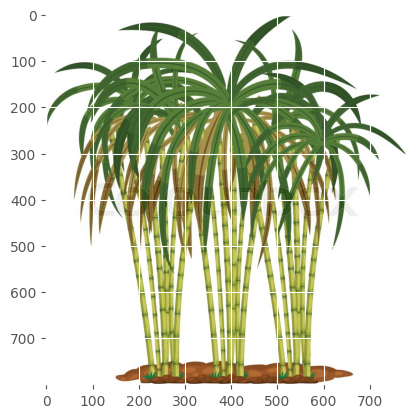

In [ ]:
predict_crop('/content/drive/MyDrive/test_crop_image/sugarcaneplant.jpg',3,class_labels)

1/1 [==============================] - 0s 20ms/step
Correct prediction
Actual class "wheat" and predicted class "wheat"


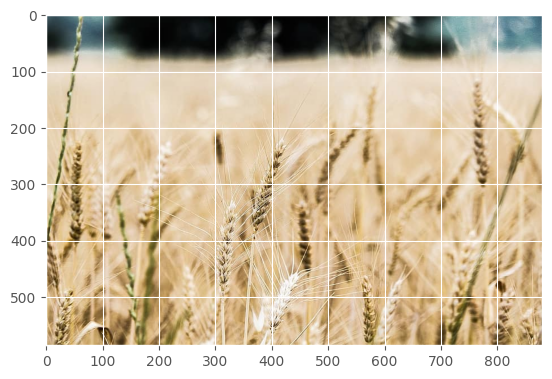

In [ ]:
predict_crop('/content/drive/MyDrive/test_crop_image/wheatss.jpg',4,class_labels)

1/1 [==============================] - 0s 17ms/step
Correct prediction
Actual class "wheat" and predicted class "wheat"


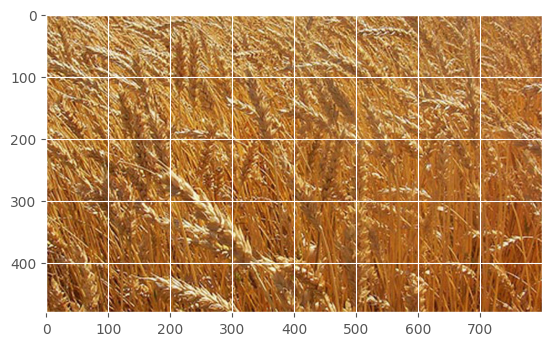

In [ ]:
predict_crop('/content/drive/MyDrive/test_crop_image/wheatcrop01.jpg',4,class_labels)

1/1 [==============================] - 0s 17ms/step
Correct prediction
Actual class "maize" and predicted class "maize"


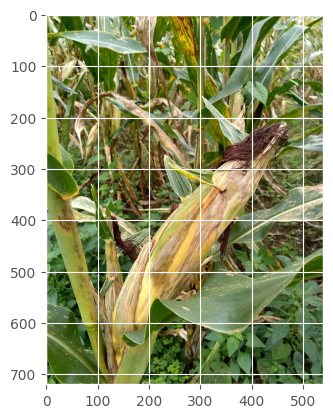

In [ ]:
predict_crop('/content/drive/MyDrive/test_crop_image/maize-field.jpg',1,class_labels)

1/1 [==============================] - 0s 17ms/step
Correct prediction
Actual class "jute" and predicted class "jute"


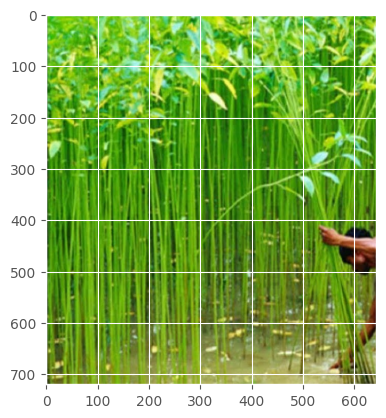

In [ ]:
predict_crop('/content/drive/MyDrive/test_crop_image/jute003.jpg',0,class_labels)

1/1 [==============================] - 0s 26ms/step
Correct prediction
Actual class "rice" and predicted class "rice"


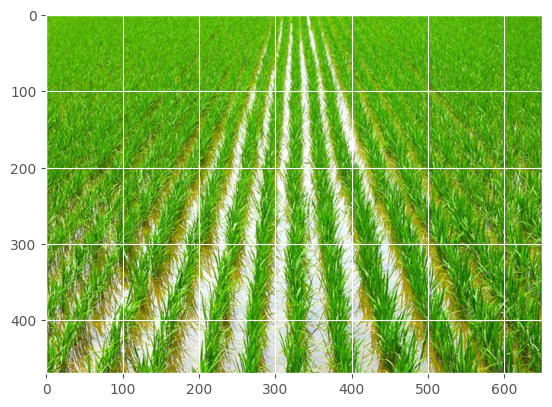

In [ ]:
predict_crop('/content/drive/MyDrive/test_crop_image/rice8122f869e3f.jpg',2,class_labels)

1/1 [==============================] - 0s 26ms/step
Messed up!!
Actual class "sugarcane" and predicted class "maize"


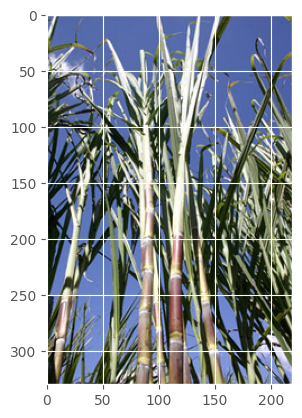

In [ ]:
predict_crop('/content/drive/MyDrive/test_crop_image/sugarcane fields.jpg',3,class_labels)

In [ ]:
class_labels

{0: 'jute', 1: 'maize', 2: 'rice', 3: 'sugarcane', 4: 'wheat'}